<h2>Fourier Transform Cheat Sheet</h2>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# PARAMETRY SYGNAŁU
fs = 200           # fs = 200 Hz (próbek na sekundę)
T = 5             # T = 1 sekunda
N = fs * T         # N = liczba próbek
t = np.linspace(0, T, N, endpoint=False)

# SYGNAŁ: 2 Hz + 3 Hz
x = np.cos(2*np.pi*2*t) + np.cos(2*np.pi*3*t)

Częstotliwość próbkowania Hz - ile próbek na sekundę: $$ f_s $$
Czas trwania sygnału s: $$ T $$
Liczba próbek (ile punktów sygnału): $$ N = f_s T $$
Próbkowanie: $$ t_n = {n \over f_s}, n = 0,1,...,N-1 $$
Indeks częstotliwości - liczba obrotów wektora w N próbkach: $$ k $$
Częstotliwość fizyczna odpowiadająca k: $$ f_k = k {f_s \over N}, k = 0,1,2,...,N-1 $$

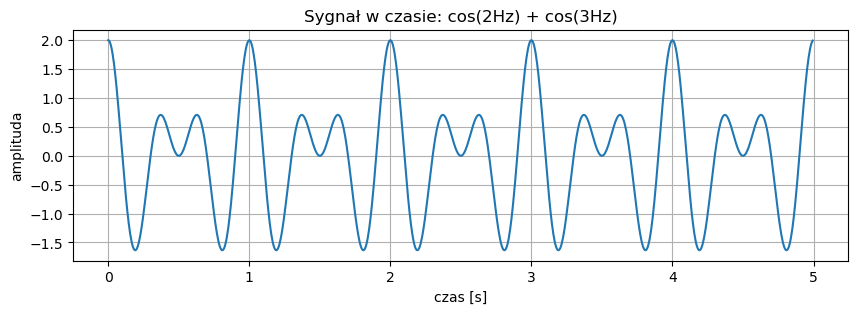

In [5]:
plt.figure(figsize=(10,3))
plt.plot(t, x)
plt.title("Sygnał w czasie: cos(2Hz) + cos(3Hz)")
plt.xlabel("czas [s]")
plt.ylabel("amplituda")
plt.grid(True)
plt.show()

In [16]:
from ipywidgets import interact, FloatSlider

In [ ]:
def interactive_fft(f=2.0):
    z2 = np.exp(1j * 2 * np.pi * f * t) * x

    plt.figure(figsize=(5,5))
    plt.plot(z2.real, z2.imag)
    center = np.mean(z2)
    plt.scatter(center.real, center.imag, color="red", s=90, label="środek ciężkości")
    plt.title("Nawiniecie sygnału na okrąg")
    plt.gca().set_aspect('equal')
    plt.grid(True)
    plt.show()
    
interact(
    interactive_fft,
    f=FloatSlider(min=0.2, max=100, step=0.2, value=2.0, description='f'),)

interactive(children=(FloatSlider(value=2.0, description='f', min=0.2, step=0.2), Output()), _dom_classes=('wi…

<function __main__.interactive_fft(f=2.0)>

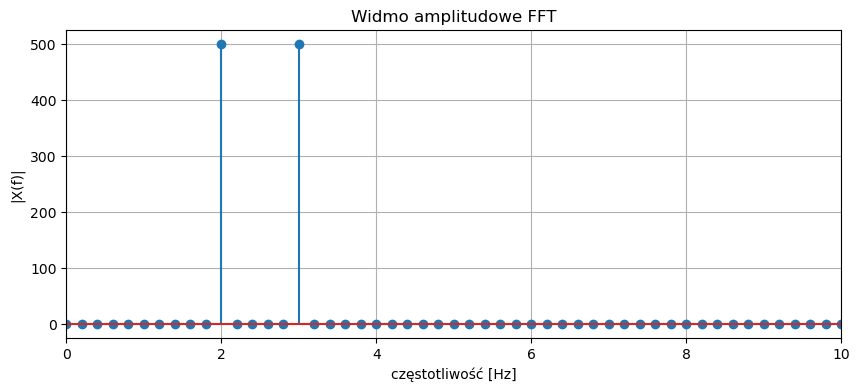

In [36]:
X = np.fft.fft(x)              # liczby zespolone FFT
freqs = np.fft.fftfreq(N, 1/fs)  # oś częstotliwości (Hz)

# bierzemy tylko dodatnie częstotliwości
positive = freqs >= 0

plt.figure(figsize=(10,4))
plt.stem(freqs[positive], np.abs(X)[positive])
plt.title("Widmo amplitudowe FFT")
plt.xlabel("częstotliwość [Hz]")
plt.ylabel("|X(f)|")
plt.xlim(0, 10)   # widmo do 10 Hz
plt.grid(True)
plt.show()